In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time
import json

import numpy as np
from numpy.typing import NDArray
from typing import List, Tuple

from sklearn import metrics

In [2]:
name = "../library_test/credentials/identity_attributes_driving_license.csv"

df = pd.read_csv(name).iloc[:100]
df["JSON information"] = df["JSON information"].apply(lambda x: json.loads(x))
df["number_attributes"]= 12+df["Number of general additional informations"]+3*df["Number of categories"]+df["Number of additional inforations of each categories"].apply(lambda x: sum(map(int, x.split(','))))

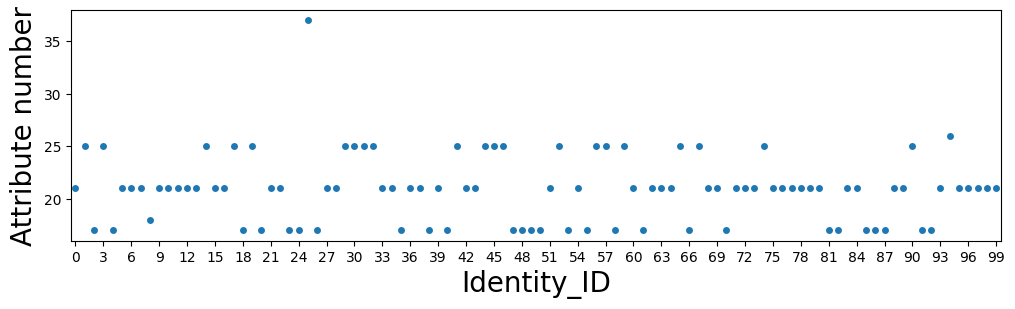

count    100.000000
mean      20.940000
std        3.268521
min       17.000000
25%       17.000000
50%       21.000000
75%       21.000000
max       37.000000
Name: number_attributes, dtype: float64


In [3]:
plt.figure(figsize=(12, 3))
strip = sns.stripplot(x=df["Personal Number"], y=df["number_attributes"])
strip.set_xticks(range(0,100,3))

# Set the labels with the desired font size
strip.set_xlabel("Identity_ID", fontsize=20)
strip.set_ylabel("Attribute number", fontsize=20)

plt.show()
print(df["number_attributes"].describe())

/var/folders/cp/c9cg0sd95bdg_22hr4zb39s40000gn/T/ipykernel_18404/2123158642.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x=df["number_attributes"], palette="Set2", order=df["number_attributes"].unique())


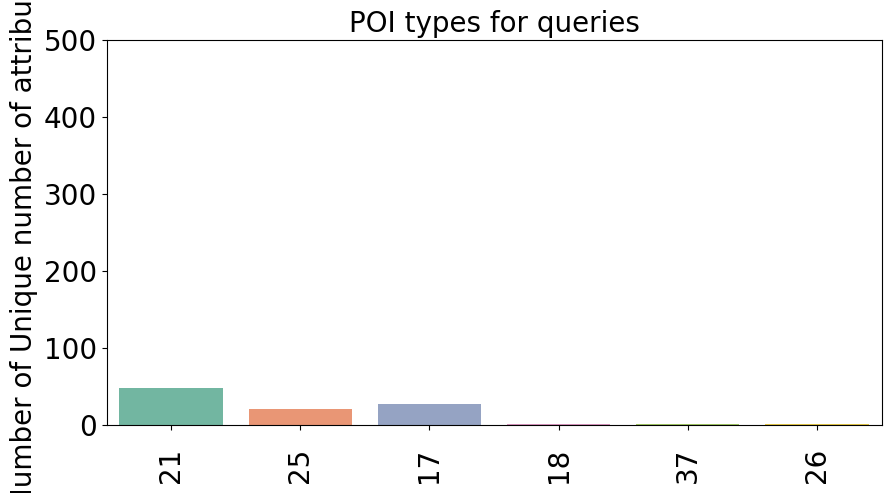

number_attributes
21    49
17    27
25    21
18     1
37     1
26     1
Name: count, dtype: int64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,5))
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

# Create the countplot
g = sns.countplot(x=df["number_attributes"], palette="Set2", order=df["number_attributes"].unique())

# Remove x-axis labels
g.set(xticklabels=[])

g.set_title("POI types for queries", fontsize=20)
g.set_xlabel("", fontsize=20)
g.set_ylabel("Number of Unique number of attributes", fontsize=20)
g.set(ylim=(0, 500))

# Adding text inside the bars
unique_values = df["number_attributes"].unique()
for i, p in enumerate(g.patches):
    g.text(p.get_x() + p.get_width()/2, -75, unique_values[i], 
           fontsize=20, color='black', ha='center', va='bottom', rotation='vertical')

plt.show()
print(df["number_attributes"].value_counts())

In [27]:
name = "../library_test/credentials/identity_attributes_stat_driving_license_full.csv"

df_stat = pd.read_csv(name)
print(df_stat["JSON information"].describe())

print(df_stat["JSON information"].value_counts())


count    1.000000e+07
mean     1.973757e+01
std      3.377518e+00
min      1.600000e+01
25%      1.600000e+01
50%      2.000000e+01
75%      2.000000e+01
max      5.200000e+01
Name: JSON information, dtype: float64
JSON information
20    4713671
16    3214383
24    1764319
28     149657
32     141898
40       9370
36       4899
26        631
25        358
22        290
21        197
31        124
27         56
29         38
33         32
46         32
17         19
42         16
35          3
37          3
30          2
45          1
52          1
Name: count, dtype: int64


 Unique Number attribute [20 16 24 32 28 22 40 36 26 46 31 27 29 21 33 25 17 42 35 37 30 45 52]



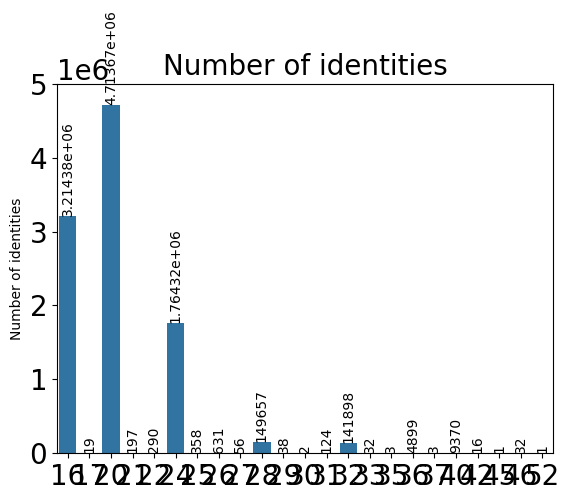

In [31]:
print(f" Unique Number attribute {df_stat["JSON information"].unique()}\n")
# Create the countplot
g = sns.countplot(x=df_stat["JSON information"], orient="y", order=df_stat["JSON information"].unique().sort())

g.bar_label(g.containers[0], rotation=90)
g.set_title("Number of identities", fontsize=20)
g.set_xlabel("", fontsize=20)
g.set_ylabel("Number of identities", fontsize=10)
g.set(ylim=(0, 5000000))


plt.show()